# Mnist with DNN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from layer import dense, softmax_with_cross_entropy_error
from optimizer import GDoptimizer
from actfunc import relu
from etcfunc import get_batch
from mnist.load_mnist import mnist

#### load Mnist

In [2]:
mnist = mnist()

## hyperparameter

In [3]:
learning_rate = 0.002
batch_size = 64
iteration = 50000
input_size = 28 * 28
layer1_output = 128
layer2_output = 64
layer3_output = 32
layer4_output = 10

## Three layer Model

In [4]:
class model():
    def __init__(self):
        self.layers = []
        self.layers.append(dense(input_size, layer1_output, activation=relu, name="layer1"))
        self.layers.append(dense(layer1_output, layer2_output, activation=relu, name="layer2"))
        self.layers.append(dense(layer2_output, layer3_output, name="layer3"))
        self.layers.append(dense(layer3_output, layer4_output, name="layer4"))
        self.errorfunc = softmax_with_cross_entropy_error()
        
    def predict(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def loss(self, X, t):
        return self.errorfunc.forward(self.predict(X), t)
    
    def backward(self):
        dout = self.errorfunc.backward()
        for layer in self.layers[::-1]:
            dout = layer.backward(dout)

In [5]:
model = model()
optimizer = GDoptimizer(learning_rate)

In [6]:
loss_list =[]
for i in range(iteration):
    X, y = get_batch(mnist.train_images, mnist.train_labels, batchsize=batch_size)
    loss_list.append(model.loss(X, y))
    model.backward()
    optimizer.minimize(model.layers)
    if i % 5 == 0:
        print("loss of iter ({}) : {}".format(i, model.loss(X, y)))

loss of iter (0) : 13.567390441894531
loss of iter (5) : 12.844107627868652
loss of iter (10) : 15.055355072021484
loss of iter (15) : 12.298299789428711
loss of iter (20) : 4.0992536544799805
loss of iter (25) : 2.569580554962158
loss of iter (30) : 2.255901336669922
loss of iter (35) : 2.1208646297454834
loss of iter (40) : 2.156780481338501
loss of iter (45) : 1.9831048250198364
loss of iter (50) : 2.0191638469696045
loss of iter (55) : 1.9119524955749512
loss of iter (60) : 2.024580717086792
loss of iter (65) : 1.9171078205108643
loss of iter (70) : 1.9041342735290527
loss of iter (75) : 2.1896402835845947
loss of iter (80) : 2.124371290206909
loss of iter (85) : 1.9988515377044678
loss of iter (90) : 2.1145410537719727
loss of iter (95) : 2.0032591819763184
loss of iter (100) : 2.0110349655151367
loss of iter (105) : 2.103179693222046
loss of iter (110) : 1.9475586414337158
loss of iter (115) : 1.8940088748931885
loss of iter (120) : 2.195160388946533
loss of iter (125) : 2.045333

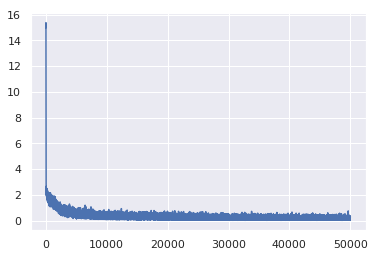

In [7]:
plt.plot(loss_list);

In [8]:
#np.argmax(model.predict(mnist.test_images), axis=1)
predict = np.argmax(model.predict(mnist.test_images), axis=1)
labels = np.argmax(mnist.test_labels, axis=1)
len(predict[predict == labels]) / len(predict)

0.9404